In [69]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [70]:
wine = pd.read_csv("data.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [71]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [73]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='quality', ylabel='fixed acidity'>

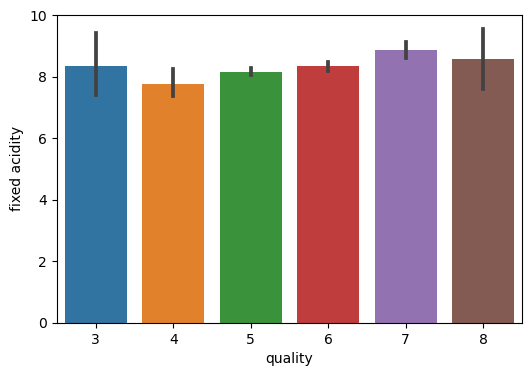

In [74]:
fig = plt.figure(figsize= (6, 4)) # rep the size of the chat
sns.barplot(x="quality", y= "fixed acidity", data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

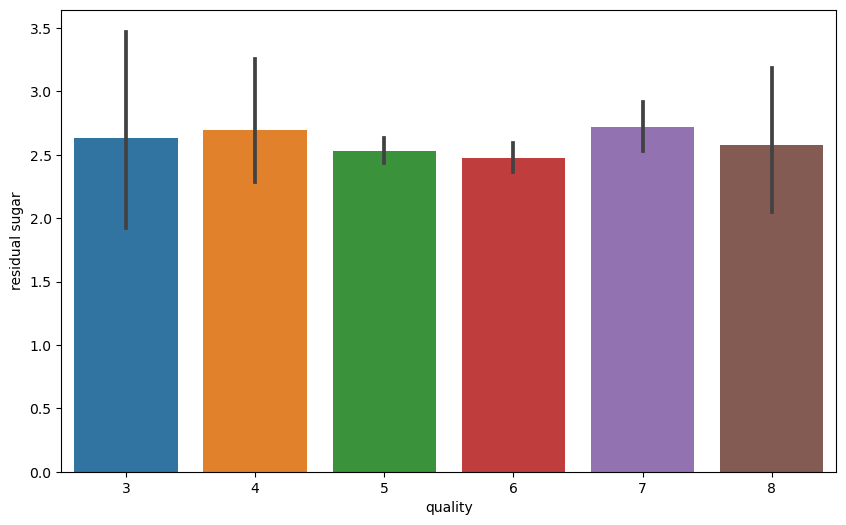

In [75]:
fig = plt.figure(figsize= (10, 6))
sns.barplot(x= "quality", y= "residual sugar", data = wine)

In [76]:
bins = (2, 6.5, 8)
group_names = ["bad", "good"]
wine["quality"] = pd.cut(wine["quality"], bins = bins, labels = group_names)

In [77]:
wine["quality"]

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [78]:
label_quality = LabelEncoder()

In [79]:
wine["quality"] = label_quality.fit_transform(wine["quality"])
wine["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [80]:
wine["quality"]

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [81]:
x = wine.drop("quality", axis = 1)
y = wine["quality"]

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [83]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [84]:
print(x_train)

[[ 0.21833164  0.88971201  0.19209222 ...  1.09349989  0.45822284
   1.12317723]
 [-1.29016623 -1.78878251  0.65275338 ... -0.40043872 -0.40119696
   1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 ... -0.07566946  0.51551749
  -0.58738978]
 ...
 [-0.65195559  0.49909822 -1.08752211 ...  1.28836145 -0.68767023
  -0.87248428]
 [-0.24582155 -1.84458448  0.39683051 ...  0.05423824  0.80199076
   1.40827174]
 [-1.46422367 -1.34236676 -0.06383064 ...  0.50891521 -0.68767023
   2.92877575]]


In [85]:
print(x_test)

[[-3.33991288e-01  2.42581186e-01 -9.63136787e-01 ... -4.42561113e-01
   6.34928030e-02 -7.55088351e-01]
 [-2.78643172e-01 -9.49230728e-02 -4.94583756e-01 ...  5.19964189e-01
  -1.15964614e+00 -8.44713081e-01]
 [ 1.32645219e+00  8.61338994e-01 -2.34276516e-01 ... -1.85887699e-01
   2.23796204e+00 -4.86214161e-01]
 ...
 [-1.90259149e-03  4.67584025e-01 -7.80921719e-02 ... -1.02007629e+00
  -8.19885325e-01 -5.75838891e-01]
 [ 2.74837989e-01 -1.38868940e+00  6.50768099e-01 ... -1.02007629e+00
   2.67349294e-01  6.78907330e-01]
 [ 4.40882337e-01  1.39572074e+00 -1.17138258e+00 ... -1.21719346e-01
  -7.51933161e-01 -6.65463621e-01]]


In [86]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [87]:
print(pred_rfc)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [88]:
print("Accuaracy score =",accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))


Accuaracy score = 0.878125
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.65      0.36      0.47        47

    accuracy                           0.88       320
   macro avg       0.78      0.66      0.70       320
weighted avg       0.86      0.88      0.86       320



In [89]:
# Another model 
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [90]:
print("Accuaracy score =",accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Accuaracy score = 0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [91]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc,param, cv=10, verbose=2)

In [92]:
grid_svc.fit(x_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [93]:
pred = grid_svc.predict(x_test)
print("Accuaracy score =", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuaracy score = 0.896875
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [94]:
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10, verbose=2)
rfc_eval.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.4s finished


0.9179256889763779